# Dataset overview

In [1]:
import pandas as pd

In [2]:
df_twitter = pd.read_csv('Tweets.csv')
df_twitter

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [3]:
# selcting text and sentiment columns
df_twitter = df_twitter[['text', 'sentiment' ]]
# showing the dataframe
df_twitter

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


In [4]:
# shape of the dataframe
df_twitter.shape

(27481, 2)

In [5]:
# 5000 positive sentiment
df_twitter_postive = df_twitter[df_twitter['sentiment'] == 'positive'][:5000]
#7000 negative sentiment
df_twitter_negative = df_twitter[df_twitter['sentiment'] == 'negative'][:7000]
# 3000 neutral sentiment
df_twitter_neutral = df_twitter[df_twitter['sentiment'] == 'neutral'][:3000]

In [6]:
# concatinating all the sentiments
df_twitter = pd.concat([df_twitter_postive , df_twitter_negative , df_twitter_neutral])
# showing the concatinating dataframe
df_twitter

,text,sentiment
6,2am feedings for the baby are fun when he is a...,positive
9,Journey!? Wow... u just became cooler. hehe....,positive
11,I really really like the song Love Story by Ta...,positive
21,Playing Ghost Online is really interesting. Th...,positive
25,"the free fillin` app on my ipod is fun, im add...",positive
...,...,...
7402,listening to some music!,neutral
7405,"I applaud you for accepting **** marriage, I ...",neutral
7406,yeah !!,neutral
7407,The sun just came out!!! Pray for me guys!!! ...,neutral


# Dealing with imbalance data

<Axes: xlabel='sentiment'>

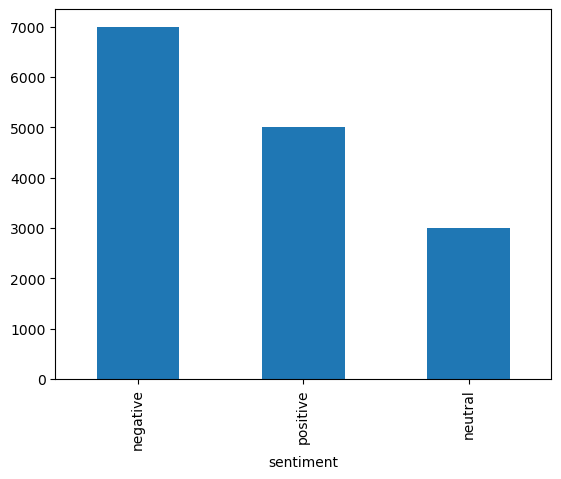

In [7]:
# making a barpolt to show how data is distributed
df_twitter.value_counts('sentiment').plot(kind='bar')

In [8]:
# Balancing with RandomUnderSampler 
from imblearn.under_sampling import RandomUnderSampler
# positive sentiments
rus = RandomUnderSampler(random_state=0)
df_twitter_bal, df_twitter_bal['sentiment'] = rus.fit_resample(df_twitter[['text']], df_twitter['sentiment'])

In [9]:
df_twitter_bal.value_counts('sentiment')

sentiment
negative    3000
neutral     3000
positive    3000
Name: count, dtype: int64

In [10]:
df_twitter_bal

,text,sentiment
10138,is envious of people not in long-distance rela...,negative
4404,Well the one thing where you lay on the floor...,negative
10269,umm...why will it not let me change my backgro...,negative
16961,watching two of my patients die tonight has pu...,negative
1820,I dont care who gets mad. I like speaking my m...,negative
...,...,...
8230,Justin Timberlake totally rocked SNL tonight. ...,positive
1077,Up is out? I didn`t get the memo It looks ...,positive
8087,Nothing like alone time with your handheld de...,positive
1885,I love Broughty Ferry,positive


# Splitting data into train and test

In [11]:
# import train_test_split
from sklearn.model_selection import train_test_split

train , test = train_test_split(df_twitter_bal, test_size= 0.2, random_state=42)

In [12]:
train_x , train_y = train['text'], train['sentiment']
test_x, test_y = test['text'] , test['sentiment']

In [13]:
test_y.value_counts()

sentiment
positive    614
neutral     601
negative    585
Name: count, dtype: int64

In [14]:
# finding is there NaN values
train_x.isna().sum()
# There is NaN value & we have to drop it 
train_x = train_x.dropna()
train_y = train_y.loc[train_x.index]

In [40]:
#Nan should also be droped in y
test_x = test_x.dropna()
test_y = test_y.loc[test_x.index]

# Turning test data into numerical vector

In [16]:
# import library
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
# creating vectorizer object
tfidf = TfidfVectorizer(stop_words = 'english')
# fit and transform the vectorize object
train_x_vector = tfidf.fit_transform(train_x)

In [18]:
train_x_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 46952 stored elements and shape (7199, 11166)>

In [44]:
test_x_vector = tfidf.transform(test_x)

In [45]:
test_x_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9832 stored elements and shape (1800, 11166)>

In [46]:
# creating the matrix 
train_x_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
# checking 
print(len(test_x))
print(len(test_y))
print(test_x_vector.shape[0])

print("NaNs in test_x:", test_x.isna().sum())
print("NaNs in test_y:", test_y.isna().sum())

print("Index aligned:", test_x.index.equals(test_y.index))


1800
1800
1800
NaNs in test_x: 0
NaNs in test_y: 0
Index aligned: True


# Model selection

# Support Vector Machines(SVM)

In [22]:
# importing svm
from sklearn.svm import SVC

In [23]:
svc = SVC(kernel = 'linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [24]:
print(svc.predict(tfidf.transform([' I`d have responded, if I were going'])))
print(svc.predict(tfidf.transform(['But it was worth it  ****.'])))
print(svc.predict(tfidf.transform(['Hi All!!  I have 2 daughters.. and my youngest turns 2 on Monday.. Where did the time go??  sniffle sniffle sob. sob.'])))

['neutral']
['positive']
['negative']


# Decision tree

In [25]:
# importing the library
from sklearn.tree import DecisionTreeClassifier

In [26]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()

In [27]:
print(svc.predict(tfidf.transform([' I`d have responded, if I were going'])))
print(svc.predict(tfidf.transform(['But it was worth it  ****.'])))
print(svc.predict(tfidf.transform(['Hi All!!  I have 2 daughters.. and my youngest turns 2 on Monday.. Where did the time go??  sniffle sniffle sob. sob.'])))

['neutral']
['positive']
['negative']


# Naive Bayes

In [28]:
# importing the library
from sklearn.naive_bayes import GaussianNB

In [29]:
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()

In [30]:
print(svc.predict(tfidf.transform([' I`d have responded, if I were going'])))
print(svc.predict(tfidf.transform(['But it was worth it  ****.'])))
print(svc.predict(tfidf.transform(['Hi All!!  I have 2 daughters.. and my youngest turns 2 on Monday.. Where did the time go??  sniffle sniffle sob. sob.'])))

['neutral']
['positive']
['negative']


# Logistic Regression

In [31]:
# importing library
from sklearn.linear_model import LogisticRegression

In [32]:
log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

LogisticRegression()

In [33]:
print(svc.predict(tfidf.transform([' I`d have responded, if I were going'])))
print(svc.predict(tfidf.transform(['But it was worth it  ****.'])))
print(svc.predict(tfidf.transform(['Hi All!!  I have 2 daughters.. and my youngest turns 2 on Monday.. Where did the time go??  sniffle sniffle sob. sob.'])))

['neutral']
['positive']
['negative']


# Model Evaluation

In [57]:
# calculate confusion matrix of svc
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y,
                 svc.predict(test_x_vector),
                 labels=['positive', 'negative', 'neutral'])

array([[435,  41, 138],
       [ 33, 386, 166],
       [ 88, 135, 378]])

# Mean Accuracy

In [60]:
# For SVC model
print(svc.score(test_x_vector, test_y))
# for Decision tree
print(dec_tree.score(test_x_vector, test_y))
# for Naive Bayers
print(gnb.score(test_x_vector.toarray(), test_y))
# for Logistic Regression
print(log_reg.score(test_x_vector, test_y))


0.6661111111111111
0.6366666666666667
0.4583333333333333
0.665


# F1 Score

In [65]:
# f1 score for svc model
from sklearn.metrics import f1_score
f1_score(test_y, svc.predict(test_x_vector), labels=['positive', 'negative', 'neutral'], average=None)

array([0.74358974, 0.67306016, 0.58924396])

# Classification report

In [66]:
from sklearn.metrics import classification_report
print(classification_report(test_y, svc.predict(test_x_vector), labels=['positive', 'negative', 'neutral']))

              precision    recall  f1-score   support

    positive       0.78      0.71      0.74       614
    negative       0.69      0.66      0.67       585
     neutral       0.55      0.63      0.59       601

    accuracy                           0.67      1800
   macro avg       0.67      0.67      0.67      1800
weighted avg       0.68      0.67      0.67      1800



# Tuning the model

In [68]:
from sklearn.model_selection import GridSearchCV 
parameters =  {'C':[1,4,8,16,32], 'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc,parameters, cv=5)
svc_grid.fit(train_x_vector, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

In [69]:
svc_grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [71]:
svc_grid.best_estimator_

SVC(C=1, kernel='linear')